## 1 - Introdução

#### Objetivo: Criar um modelo preditivo que classifique o paciente através de atributos  biomecânicos derivados da pelve e coluna lombar como "normal" e "anormal".
#### Modelo de Machine Learning utilizado: K Nearest Neighbords - KNN - (modelo supervisionado e de classificação)

- Esses dados da UCI reunem seis atributos biomecânicos derivados da forma e orientação da pelve e coluna lombar. Eles foram organizados em duas tarefas de classificação diferentes, mas relacionadas.
Este dataset está relacionado à segunda tarefa, onde as categorias Hérnia de Disco e Espondilolistese foram fundidas em uma única categoria rotulada como 'anormal'. Sendo assim, foi classificado com pacientes pertencentes a uma das duas categorias: Normal (100 pacientes) ou Anormal (210 pacientes).


- Cada coluna do dataset pode ser descrita por:
incidência pélvica,
inclinação pélvica,
ângulo da lordose lombar,
inclinação sacral,
raio pélvico e
grau de espondilolistese.


- O conjunto de dados original foi baixado do repositório UCI ML:
Lichman, M. (2013). Repositório de aprendizado de máquina da UCI [http://archive.ics.uci.edu/ml]. Irvine, CA: Universidade da Califórnia - Escola de Informação e Ciência da Computação.


## 2 - Importando os pacotes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipy_table as tbl
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

warnings.filterwarnings('ignore')
sns.set_style ("whitegrid")
%matplotlib inline

In [3]:
df = pd.read_csv("ortopedic_2C.csv")

## 3 - Data wrangling

In [3]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
df.describe ()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


In [6]:
df["class"].value_counts ()

Abnormal    210
Normal      100
Name: class, dtype: int64

In [7]:
df.rename(columns={"class":"classe"}, inplace=True)

In [8]:
df.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
classe                      0
dtype: int64

In [86]:
df.isnull().values.any()

False

#### Substituindo os valores da variável target

In [10]:
df["classe"] = [1 if each == "Abnormal" else 0 for each in df["classe"]] # 1 para anormal e 0 para normal
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,classe
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [11]:
df["classe"].value_counts()

1    210
0    100
Name: classe, dtype: int64

## 4 - Data analysis

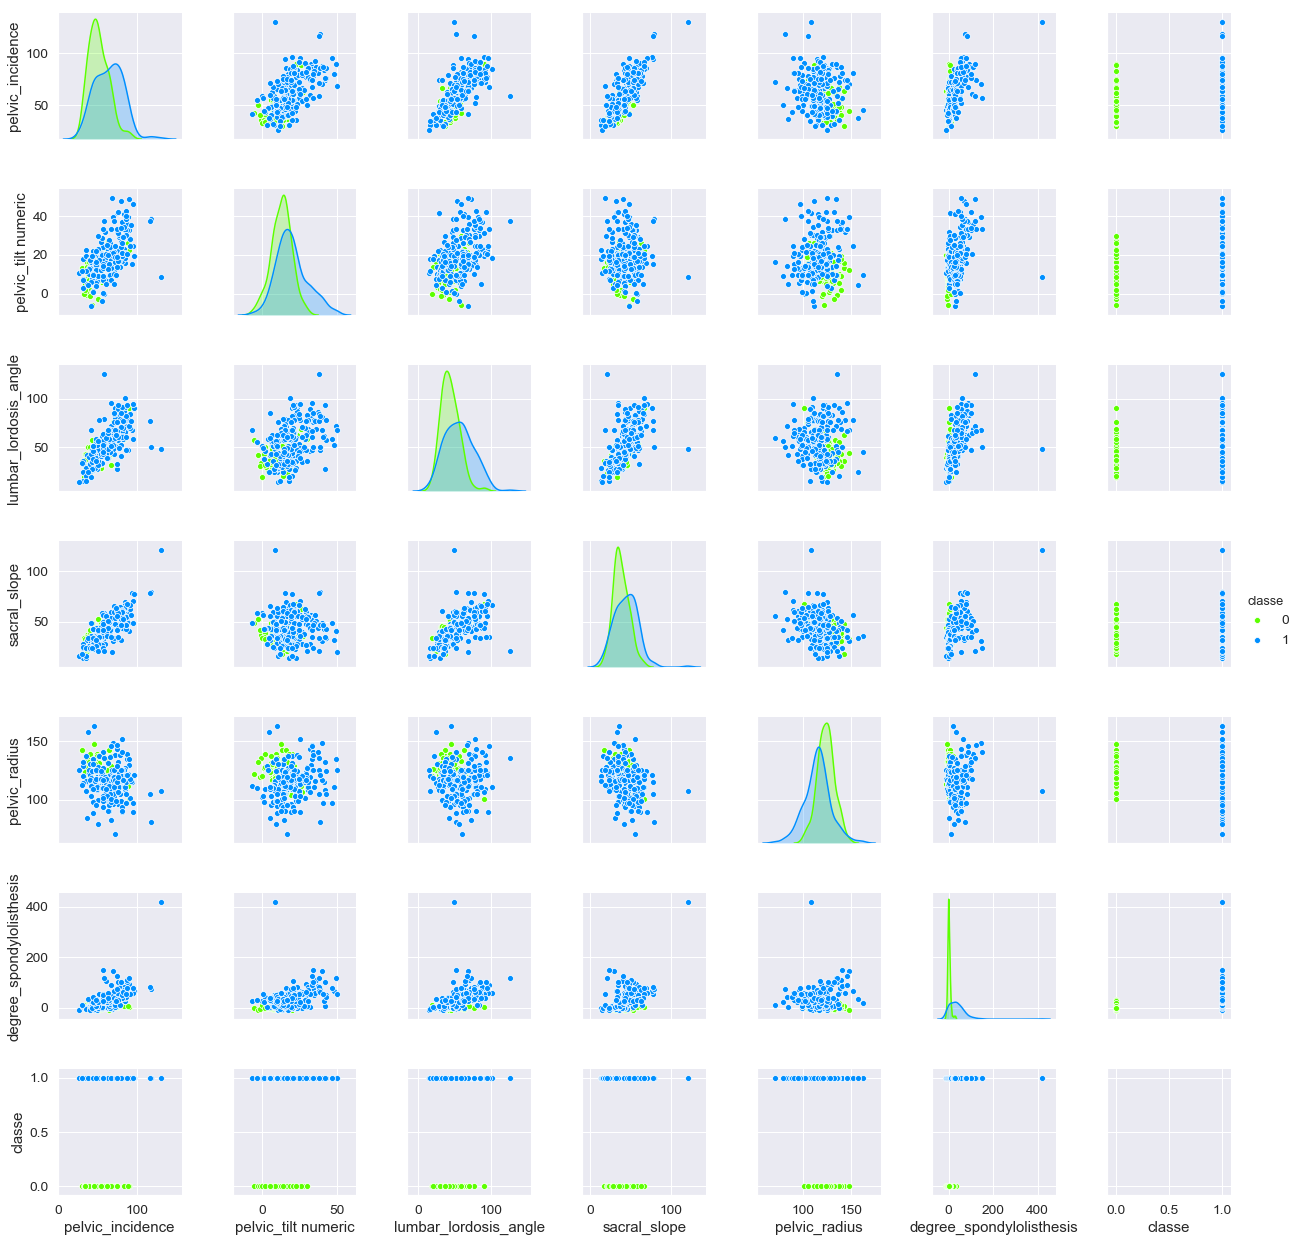

In [82]:
sns.pairplot (df, hue="classe", palette="gist_rainbow")

#### Verificando com mais detalhes a distribuição de inclinação sacral e raio pélvico

Text(40.92709743923612, 0.5, 'Inclinação sacral')

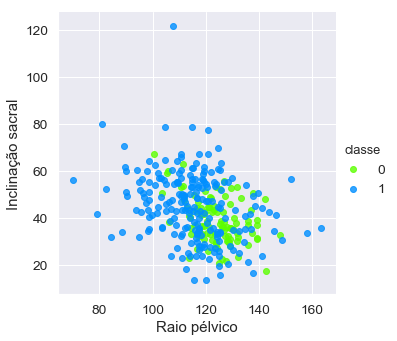

In [84]:
sns.lmplot (x="pelvic_radius", y="sacral_slope", data=df, hue="classe", fit_reg=False, palette="gist_rainbow")
plt.xlabel ("Raio pélvico")
plt.ylabel ("Inclinação sacral")

Anormal: 210 (67.74%)
Normal : 100 (32.26%)


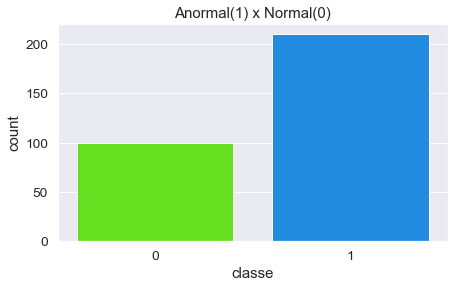

In [85]:
plt.figure (figsize=(7,4))
sns.countplot ("classe", data=df, palette="gist_rainbow")
df["classe"].value_counts()
plt.title ("Anormal(1) x Normal(0)")

num_true = len(df.loc[df['classe'] == True])
num_false = len(df.loc[df['classe'] == False])
print("Anormal: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Normal : {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

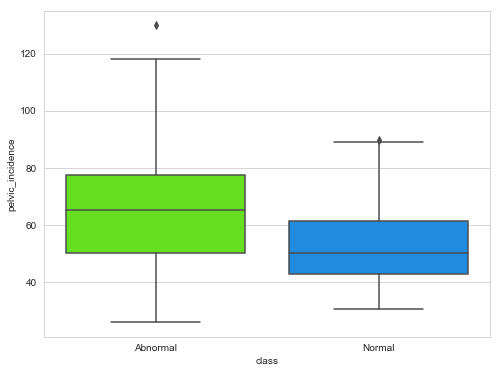

In [8]:
plt.figure (figsize=(8,6))
sns.boxplot (x="class", y="pelvic_incidence", data=df, palette="gist_rainbow", )

## 5 - Machine learning (K Nearest Neighbords)

#### Padronização dos dados

In [16]:
scaler = StandardScaler ()

In [17]:
scaler.fit (df.drop("classe", axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
transform = scaler.transform (df.drop("classe", axis=1))

#### Verificando a padronização (normalização)

In [19]:
df_transform = pd.DataFrame(transform,columns=df.columns[:-1])
df_transform.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106


#### Dividindo os dados entre treino e test

In [21]:
X_train, X_test, y_train, y_test = train_test_split (transform, df["classe"],test_size=0.3) # (x=transform, y=classe)

#### Aplicando o modelo e fazendo a predição

In [23]:
knn = KNeighborsClassifier (n_neighbors=1)

In [24]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [25]:
prediction = knn.predict(X_test)

In [27]:
print (confusion_matrix(y_test, prediction))

[[22  5]
 [12 54]]


In [28]:
print (classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.65      0.81      0.72        27
           1       0.92      0.82      0.86        66

   micro avg       0.82      0.82      0.82        93
   macro avg       0.78      0.82      0.79        93
weighted avg       0.84      0.82      0.82        93



#### O modelo teve 82% de acurácia com 1 vizinho (neighbord). 
#### Definindo o melhor número de vizinhos pela taxa de erro

In [29]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    prediction_i = knn.predict(X_test)
    error_rate.append(np.mean(prediction_i != y_test))

Text(0, 0.5, 'Error Rate')

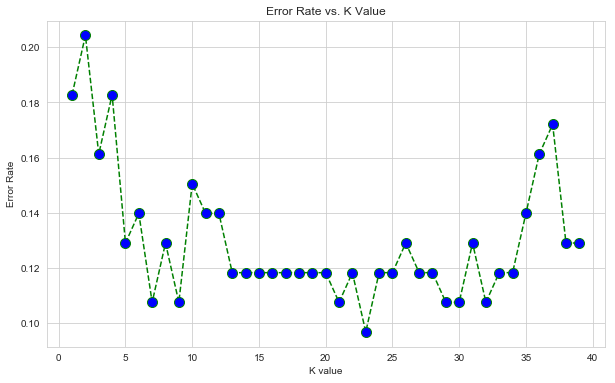

In [47]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='green', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K value')
plt.ylabel('Error Rate')

#### A melhor opção são 23 vizinhos. 

In [39]:
knn = KNeighborsClassifier(n_neighbors=23)

In [40]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=23, p=2,
           weights='uniform')

In [41]:
prediction = knn.predict(X_test)

In [42]:
print (confusion_matrix(y_test, prediction))

[[23  4]
 [ 5 61]]


In [48]:
print (classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.94      0.92      0.93        66

   micro avg       0.90      0.90      0.90        93
   macro avg       0.88      0.89      0.88        93
weighted avg       0.90      0.90      0.90        93



#### A acurácia do modelo melhorou de 82% para 90%

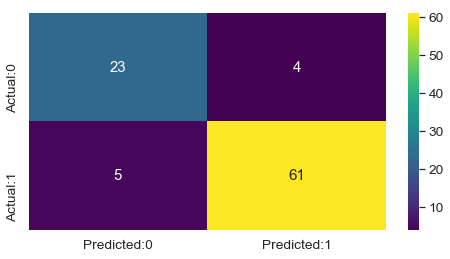

In [78]:
cm=confusion_matrix(y_test,prediction)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,4))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="viridis")

In [49]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

## 6 - Resultados

In [57]:
results = [
    ['The acuracy of the model = TP+TN/(TP+TN+FP+FN) = ', (TP+TN)/float(TP+TN+FP+FN)],
    ['The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN))],
    ['Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN)],
    ['Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP)],
    ['Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP)],
    ['Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN)],
    ['Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity)],
    ['Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/(specificity)],    
]
tbl.make_table(results)

The acuracy of the model = TP+TN/(TP+TN+FP+FN) =,0.9032
The Missclassification = 1-Accuracy =,0.0968
Sensitivity or True Positive Rate = TP/(TP+FN) =,0.9242
Specificity or True Negative Rate = TN/(TN+FP) =,0.8519
Positive Predictive value = TP/(TP+FP) =,0.9385
Negative predictive Value = TN/(TN+FN) =,0.8214
Positive Likelihood Ratio = Sensitivity/(1-Specificity) =,6.2386
Negative likelihood Ratio = (1-Sensitivity)/Specificity =,0.0889


### Visualizando a correlação entre as variáveis

Coeficiente de correlação:

+1 = forte correlação positiva

0 = não há correlação

-1 = forte correlação negativa

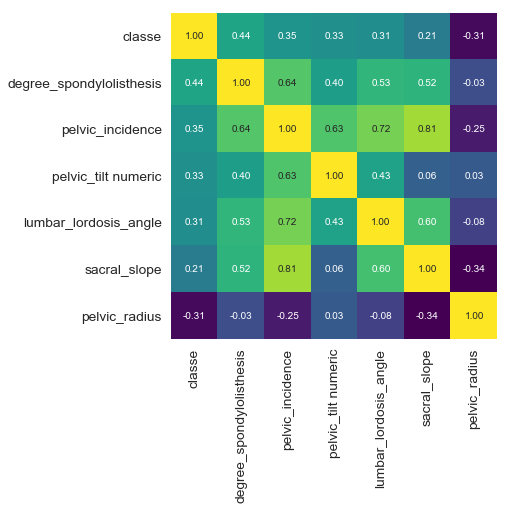

In [79]:
k = 7 #número de variáveis para o heatmap
corrmat = df.corr() #correlação
cols = corrmat.nlargest(k, 'classe')['classe'].index
cm = np.corrcoef(df[cols].values.T) #confusion matrix

plt.figure(figsize=(6,6))
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values, cmap="viridis")
plt.show()

## 7 - Conclusão

- A incidência pélvica e a inclinação sacral tem a melhor correlação tendo a classe como parâmetro.


- O modelo obteve uma acurácia de 82% utilizando apenas 1 vizinho. Depois de calcular a taxa de erro e verificar o melhor número de vizinhos, o número de 23 vizinhos foi aplicado e obteve uma acurácia de 90,32%.


- A sensitividade é muito importante nesse tipo de análise, pois é o verdadeiro positivo. Sua acurácia foi de 92,42%.
